# Introduction

### Udacity Project - Write a Data Science Blog Post

#### The Dataset - For this project, we would analyze the Stack Overflow's annual Developer Survey for the year 2019. First we will understand the dataset and the columns in the dataset and come up with 3 questions and an analysis answering the same. 

Before we go ahead an analyze the dataset, a brief overview of the survey(borrowed from Stackoverflow website).
##### "Stack Overflow’s annual Developer Survey is the largest and most comprehensive survey of people who code around the world. Each year, we field a survey covering everything from developers’ favorite technologies to their job preferences. This year marks the ninth year we’ve published our annual Developer Survey results, and nearly 90,000 developers took the 20-minute survey earlier this year."

With nearly 90,000 respondents' data and so many variables(questions in the survey, people took 20 minutes to fill !!!!!). This will be an interesting dataset to analyze. We will also utilize the survey results schema file to understand the variables better.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline

In [114]:
# Load the Census dataset
data = pd.read_csv("survey_results_public.csv")

# Success - Display the first record
display(data.head(n=1))

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [115]:
data.shape

(88883, 85)

In [116]:
data.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [117]:
data.isnull().sum()

Respondent            0
MainBranch          552
Hobbyist              0
OpenSourcer           0
OpenSource         2041
Employment         1702
Country             132
Student            1869
EdLevel            2493
UndergradMajor    13269
EduOther           4623
OrgSize           17092
DevType            7548
YearsCode           945
Age1stCode         1249
YearsCodePro      14552
CareerSat         16036
JobSat            17895
MgrIdiot          27724
MgrMoney          27726
MgrWant           27651
JobSeek            8328
LastHireDate       9029
LastInt           21728
FizzBuzz          17539
JobFactors         9512
ResumeUpdate      11006
CurrencySymbol    17491
CurrencyDesc      17491
CompTotal         32938
                  ...  
Containers         3517
BlockchainOrg     40708
BlockchainIs      28718
BetterLife         2614
ITperson           1742
OffOn              2220
SocialMedia        4446
Extraversion       1578
ScreenName         8397
SOVisit1st         5006
SOVisitFreq     

The survey data has responses from 88,883 respondents on 84 different elements. 85th column being the respondent ID to identify the respondents. The data contains mostly categorical variables or text information with only 5 columns containing continuous variables. There are lot of Null values in the dataset especially on the Block Chain questions and Compensation. We will utilize the survey results schema file to subset the data and focus only on a smaller set of variables rather than analyzing all 84 variables at a time.

In [118]:
# Subsetting the data to only analyze the variables of choice, a total of 32 columns
var_of_choice = ["Respondent", "Hobbyist", "OpenSourcer", "OpenSource", "Employment", "Country", "Student", "EdLevel",
                   "UndergradMajor", "OrgSize", "YearsCode", "Age1stCode", "YearsCodePro", "CareerSat", "JobSat",
                   "MgrIdiot", "MgrMoney", "MgrWant", "JobSeek", "LastHireDate", "JobFactors", "ConvertedComp", 
                   "WorkWeekHrs", "WorkChallenge", "WorkRemote", "ImpSyn", "SocialMedia", "Extraversion", "SOVisitFreq",
                   "SOPartFreq", "Age", "Gender"]
data = data[var_of_choice]

In [119]:
# Confirming if the subsetting procedure completed correctly
data.shape

(88883, 32)

Understanding the variables, using the survey results schema file provided, made me really curious to look at the answers to a few specific questions which were asked in the survey. Stackoverflow team have put together some interesting questions which can help us discover the general attitude and behaviour of the programmers/developers. I will pick up some of this variables specifically and analyze them a little more.<br> <br>
<b>The top 3 questions which come to my mind looking at the variable descriptions are:<br>
1) Are most Programmers really introverts?<br>
2) What Social Media channels are most popular among the Programmers?<br>
3) What are the key characteristics of individuals who use LinkedIn the most? <br>

## Question 1 - Are most Programmers really introverts?
### Analyzing the Extraversion variable in details to answer our first question.
##### Extraversion variable description - Do you prefer online chat or IRL conversations? (IRL = in real life)

In [120]:
# Finding the unique values contained in the variable
data["Extraversion"].unique()

array(['Online', 'In real life (in person)', nan, 'Neither'], dtype=object)

In [121]:
# The variable contains 4 different values one of them being nan
# Let us look at how many respondents fall under each bucket
data["Extraversion"].value_counts()

In real life (in person)    52860
Online                      24938
Neither                      9507
Name: Extraversion, dtype: int64

#### Well !!! I never did think that programmers/developers would prefer to meet other people in person..... and that to 60% of them.....programmers are extroverts !!!

In [122]:
# Replacing nan values with Not Available so that we can keep a count and visualize this better
data["Extraversion"].fillna("Not Available", inplace = True)

# Checking if the above operation worked
data["Extraversion"].value_counts()

In real life (in person)    52860
Online                      24938
Neither                      9507
Not Available                1578
Name: Extraversion, dtype: int64

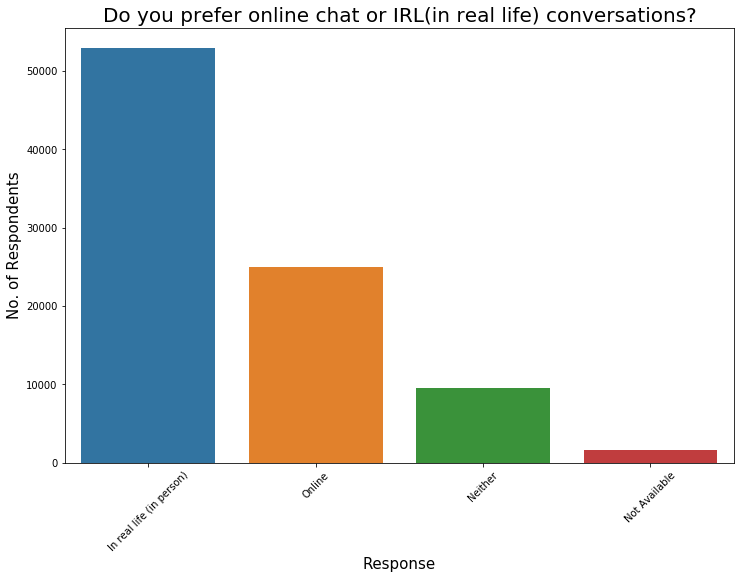

In [248]:
# Plotting the data to create our graph to be used in our blog post
table  = data["Extraversion"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(table.index, table.values)
plt.title("Do you prefer online chat or IRL(in real life) conversations?", fontsize = 20)
plt.xlabel('Response', fontsize=15)
plt.ylabel('No. of Respondents', fontsize=15)
plt.xticks(rotation=45)
plt.show()

## Question 2 - What Social Media channels are more popular among the Programmers?
### Analyzing the Social Media variable in details to answer our second question.
##### SocialMedia variable description - What social media site do you use the most?

In [124]:
# Let us first see what Social Media Channels respondents have put in
data["SocialMedia"].unique()

array(['Twitter', 'Instagram', 'Reddit', 'Facebook', 'YouTube', nan,
       'VK ВКонта́кте', 'WhatsApp', "I don't use social media",
       'WeChat 微信', 'LinkedIn', 'Snapchat', 'Weibo 新浪微博', 'Hello',
       'Youku Tudou 优酷'], dtype=object)

In [125]:
# There are 13 different Social Media channels listed
# Let us look at how many respondents fall under each bucket
data["SocialMedia"].value_counts()

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
VK ВКонта́кте                 603
Weibo 新浪微博                     56
Youku Tudou 优酷                 21
Hello                          19
Name: SocialMedia, dtype: int64

#### Surprisingly !! a lot of programmers...16% of them have listed Reddit as the most used social media channel. So, when the programmers socialize they do it on a platform which is not in the top 5 list. And, around 6% dont use social media.

Reference - 
https://www.digitaltrends.com/web/what-is-reddit/

In [126]:
# Combining channels with lesser repsinto one cateory "Others"
to_replace = ["WeChat 微信", "Snapchat", "VK ВКонта́кте", "Weibo 新浪微博", "Youku Tudou 优酷", "Hello"]
data["SocialMedia"].replace(to_replace, "Others", inplace = True)

# Checking if the above operation worked
data["SocialMedia"].value_counts()

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
Others                       1994
Name: SocialMedia, dtype: int64

In [127]:
# shortening the category name "I don't use social media" so that it be easily represented on the chart
data["SocialMedia"].replace("I don't use social media", "Do not use", inplace = True)

# Checking if the above operation worked
data["SocialMedia"].value_counts()

Reddit        14374
YouTube       13830
WhatsApp      13347
Facebook      13178
Twitter       11398
Instagram      6261
Do not use     5554
LinkedIn       4501
Others         1994
Name: SocialMedia, dtype: int64

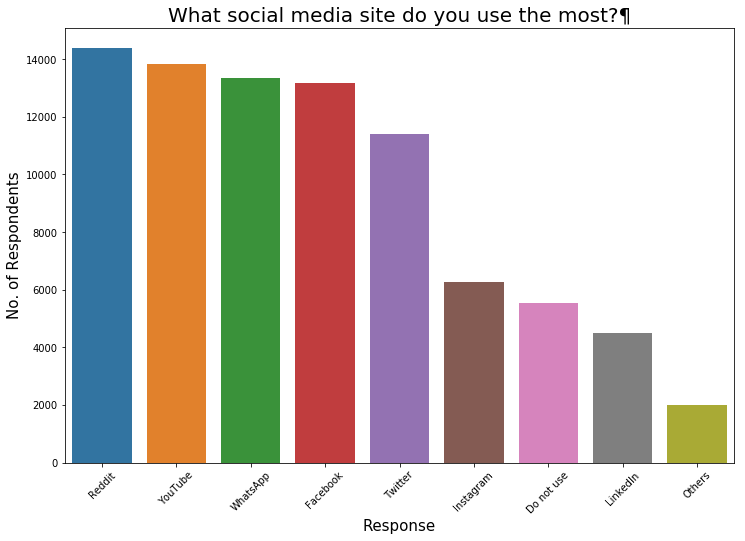

In [249]:
# Plotting the data to create our graph to be used in our blog post
table  = data["SocialMedia"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(table.index, table.values)
plt.title("What social media site do you use the most?¶", fontsize = 20)
plt.xlabel('Response', fontsize=15)
plt.ylabel('No. of Respondents', fontsize=15)
plt.xticks(rotation=45)
plt.show()

##### Reddit is the most used social media channel by the programmers. 
##### Let us understand how Reddit is different from the rest. So, Reddit is an American social news aggregation, web content rating, and discussion website. Registered members submit content to the site such as links, text posts, and images, which are then voted up or down by other members. (Reference - Wikipedia)
##### Reddit essentially is a collection of more than a million communities created based on interests which is quite different from other social media channels like YouTube which is more video oriented to something like Whatsapp or Facebook and compeletely different from Twitter which is more of content sharing platforms.
##### The other different social media channel on the list is LinkedIn but it is popular only among 5% of the respondents.
###### Are these 5% different from the rest?, Let us look at this in a little more details.

## Question 3 - What are the key characteristics of individuals who use LinkedIn the most? 
### Utilizing the Social Media variable in a different way to answer our question.
##### For this we will run a RandomForest Classifier and look at the feature importances

In [129]:
# Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

In [130]:
# Creating the binary variable for our Y to be used in the RandomForest Classifier
data['Pref_Linkedin'] = data['SocialMedia'].apply(lambda x: 1 if x == 'LinkedIn' else 0)

In [131]:
data['Pref_Linkedin'].sum()

4501

In [200]:
# Not doing a train test split as we are only interested in identifying the characteristics which defines a Linkedin User
X=data.drop(['Pref_Linkedin'], axis = 1) # Features
y=data['Pref_Linkedin']

In [201]:
X.describe()

,Respondent,ConvertedComp,WorkWeekHrs,Age
count,88883.000000,5.582300e+04,64503.000000,79210.000000
mean,44442.000000,1.271107e+05,42.127197,30.336699
std,25658.456325,2.841523e+05,37.287610,9.178390
min,1.000000,0.000000e+00,1.000000,1.000000
25%,22221.500000,2.577750e+04,40.000000,24.000000
50%,44442.000000,5.728700e+04,40.000000,29.000000
75%,66662.500000,1.000000e+05,44.750000,35.000000
max,88883.000000,2.000000e+06,4850.000000,99.000000


In [202]:
to_replace = ["More than 50 years", "Less than 1 year"]
replace_with = [50, 1]
X["YearsCodePro"].replace(to_replace,replace_with, inplace = True)
X["YearsCode"].replace(to_replace,replace_with, inplace = True)

In [203]:
X = X.drop(['Respondent','Country', 'Extraversion','JobFactors', 'WorkChallenge', 'SocialMedia', 'SOVisitFreq', 'SOPartFreq', 'Age1stCode' , 'LastHireDate', 'OpenSource'], axis = 1)

In [204]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 21 columns):
Hobbyist          88883 non-null object
OpenSourcer       88883 non-null object
Employment        87181 non-null object
Student           87014 non-null object
EdLevel           86390 non-null object
UndergradMajor    75614 non-null object
OrgSize           71791 non-null object
YearsCode         87938 non-null object
YearsCodePro      74331 non-null object
CareerSat         72847 non-null object
JobSat            70988 non-null object
MgrIdiot          61159 non-null object
MgrMoney          61157 non-null object
MgrWant           61232 non-null object
JobSeek           80555 non-null object
ConvertedComp     55823 non-null float64
WorkWeekHrs       64503 non-null float64
WorkRemote        70284 non-null object
ImpSyn            71779 non-null object
Age               79210 non-null float64
Gender            85406 non-null object
dtypes: float64(3), object(18)
memory usage: 14.

In [205]:
X["YearsCode"] = X.YearsCode.astype(float)
X["YearsCodePro"] = X.YearsCodePro.astype(float)

In [206]:
X.columns

Index(['Hobbyist', 'OpenSourcer', 'Employment', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'YearsCodePro', 'CareerSat',
       'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'ConvertedComp',
       'WorkWeekHrs', 'WorkRemote', 'ImpSyn', 'Age', 'Gender'],
      dtype='object')

In [209]:
cat = ['Hobbyist', 'OpenSourcer', 'Employment','Student', 'EdLevel', 'UndergradMajor', 
       'OrgSize', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'WorkRemote',
       'ImpSyn', 'Gender']

In [210]:
X_one_hot = pd.get_dummies(X, columns = cat)

In [211]:
from sklearn.preprocessing import Imputer 
imputer = Imputer()
X_one_hot = pd.DataFrame(imputer.fit_transform(X_one_hot), columns = X_one_hot.columns)

In [242]:
X_one_hot_new = X_one_hot.drop([], axis=1)

In [243]:
# Instantiating a Gaussian Classifier
clf=RandomForestClassifier()

In [244]:
# Train the model
clf.fit(X_one_hot_new,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [245]:
feature_imp = pd.Series(clf.feature_importances_, index = X_one_hot_new.columns).sort_values(ascending=False)
feature_imp

Age                                                                                           0.082909
YearsCode                                                                                     0.081573
ConvertedComp                                                                                 0.072744
YearsCodePro                                                                                  0.062768
WorkWeekHrs                                                                                   0.048741
UndergradMajor_Computer science, computer engineering, or software engineering                0.016477
OpenSourcer_Less than once per year                                                           0.016017
OpenSourcer_Never                                                                             0.015704
OpenSourcer_Less than once a month but more than once per year                                0.014735
EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)                         

No handles with labels found to put in legend.


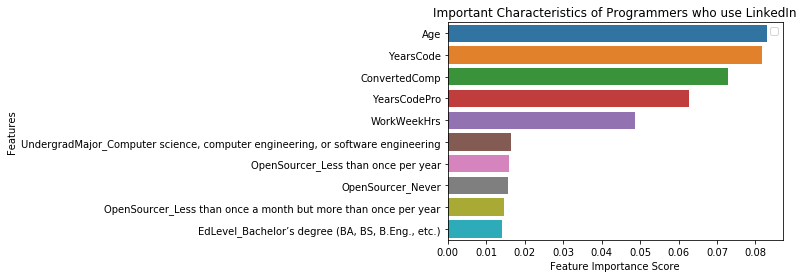

In [252]:
sns.barplot(x=feature_imp[:10], y=feature_imp.index [:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Characteristics of Programmers who use LinkedIn")
plt.legend()
plt.show()

#### With the above exercise we see that the first 10 important features in determining if a respondent prefers LinkedIn are age, no. of years of coding, compensation, no. of years as professional coder, work week hours, Undergraduate degree being computer or software engineering, less frequent OpenSourcer and a Education level as Bachelor's